# 1. Thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('ETH_Dataset.csv')
df['ClosingPrice'] = df['Closing Price (USD)']/10000
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,ClosingPrice
0,2020-06-01,0.023125
1,2020-06-02,0.025006
2,2020-06-03,0.023731
3,2020-06-04,0.024452
4,2020-06-05,0.024341
...,...,...
381,2021-06-17,0.238713
382,2021-06-18,0.234291
383,2021-06-19,0.220833
384,2021-06-20,0.218141


In [3]:
#Lấy Date làm index

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

### Vẽ sơ đồ minh họa

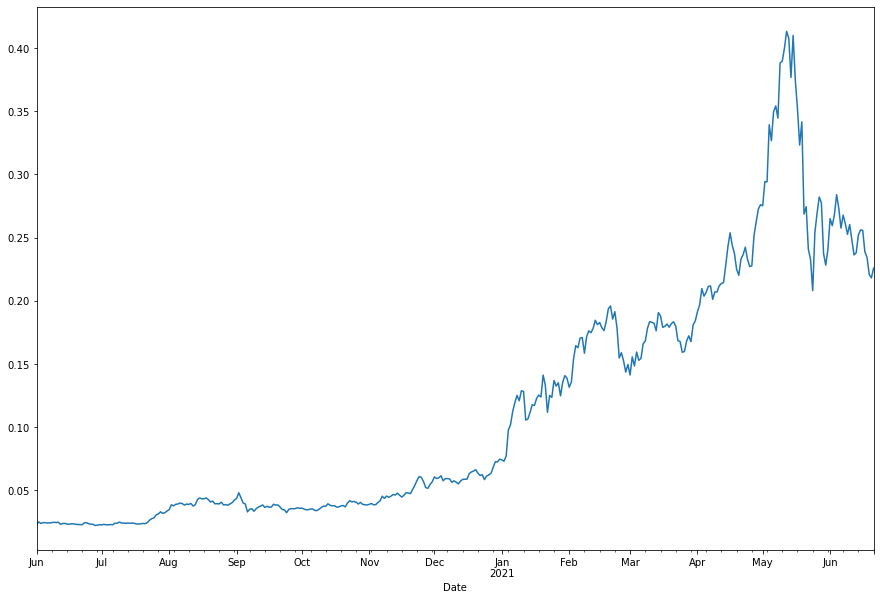

In [5]:
df['ClosingPrice'].plot(kind='line',figsize=(15, 10))

plt.show()

# 2. Tiền xử lý và Chia train/test

#### 2.1 Chi dữ liệu train test theo tỉ lệ train: 80%, test: 20%

In [6]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [7]:
price =df[['ClosingPrice']]
price

,ClosingPrice
Date,
2020-06-01,0.023125
2020-06-02,0.025006
2020-06-03,0.023731
2020-06-04,0.024452
2020-06-05,0.024341
...,...
2021-06-17,0.238713
2021-06-18,0.234291
2021-06-19,0.220833


In [8]:
price = np.array(price)
price

array([[0.02312504],
       [0.02500599],
       [0.02373091],
       [0.02445194],
       [0.02434133],
       [0.02407664],
       [0.02423214],
       [0.02438257],
       [0.02470408],
       [0.02445429],
       [0.02474454],
       [0.02305056],
       [0.02372197],
       [0.02382201],
       [0.02326133],
       [0.0231255 ],
       [0.02347509],
       [0.0234031 ],
       [0.02318059],
       [0.02288903],
       [0.02287452],
       [0.02276155],
       [0.02432282],
       [0.02429271],
       [0.02351757],
       [0.02325691],
       [0.02299451],
       [0.02214079],
       [0.02241848],
       [0.02283333],
       [0.02259468],
       [0.02307049],
       [0.0226723 ],
       [0.02263593],
       [0.02288072],
       [0.02270958],
       [0.02389297],
       [0.0238434 ],
       [0.02482819],
       [0.02417872],
       [0.02401468],
       [0.02389943],
       [0.02402237],
       [0.02393273],
       [0.02408414],
       [0.02384254],
       [0.02330853],
       [0.023

In [9]:
train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

308 78


# 3. Thực hiện mô hình ARIMA

In [10]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [11]:
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2385.344, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2388.668, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2387.345, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2387.338, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2386.301, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.144 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  308
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1196.334
Date:                Sun, 04 Jul 2021   AIC                          -2388.668
Time:                        16:44:07   BIC                          -2381.215
Sample:                             0   HQIC                         -2385.688
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.000      2.088      0.037    3.61e-05       0.001
sigma2      2.414e-05   9.58e-07     25.201      0.000    2.23e-05     2.6e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):               518.75
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              29.09   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ARIMA_predict = arima_model.predict(len(test))

# 4. Quá trình kết hợp SVR

In [13]:
prediction = pd.DataFrame(arima_model.predict(len(test)),index=df.tail(len(test)).index)
prediction.columns=['ARIMA_predict']

In [14]:
prediction['ClosingPrice']=df['ClosingPrice'].tail(len(test))

In [15]:
prediction

,ARIMA_predict,ClosingPrice
Date,,
2021-04-05,0.204263,0.206751
2021-04-06,0.204851,0.211414
2021-04-07,0.205439,0.211760
2021-04-08,0.206027,0.201155
2021-04-09,0.206615,0.206966
...,...,...
2021-06-17,0.247188,0.238713
2021-06-18,0.247776,0.234291
2021-06-19,0.248364,0.220833


In [16]:
prediction['Error'] = prediction['ClosingPrice'] -prediction['ARIMA_predict']

prediction

,ARIMA_predict,ClosingPrice,Error
Date,,,
2021-04-05,0.204263,0.206751,0.002488
2021-04-06,0.204851,0.211414,0.006563
2021-04-07,0.205439,0.211760,0.006320
2021-04-08,0.206027,0.201155,-0.004872
2021-04-09,0.206615,0.206966,0.000351
...,...,...,...
2021-06-17,0.247188,0.238713,-0.008475
2021-06-18,0.247776,0.234291,-0.013485
2021-06-19,0.248364,0.220833,-0.027531


In [17]:
prediction['Date']=prediction.index
prediction

,ARIMA_predict,ClosingPrice,Error,Date
Date,,,,
2021-04-05,0.204263,0.206751,0.002488,2021-04-05
2021-04-06,0.204851,0.211414,0.006563,2021-04-06
2021-04-07,0.205439,0.211760,0.006320,2021-04-07
2021-04-08,0.206027,0.201155,-0.004872,2021-04-08
2021-04-09,0.206615,0.206966,0.000351,2021-04-09
...,...,...,...,...
2021-06-17,0.247188,0.238713,-0.008475,2021-06-17
2021-06-18,0.247776,0.234291,-0.013485,2021-06-18
2021-06-19,0.248364,0.220833,-0.027531,2021-06-19


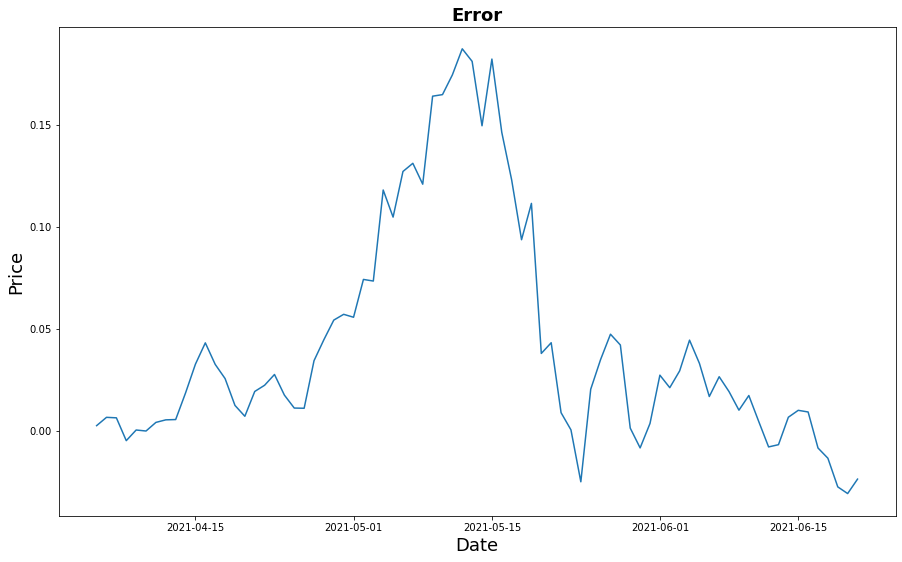

In [18]:
error = prediction[['Error']]

plt.figure(figsize = (15,9))
plt.plot(error)
plt.title("Error",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [19]:
error = np.array(error)
error

array([[ 2.48827850e-03],
       [ 6.56318356e-03],
       [ 6.32036038e-03],
       [-4.87218844e-03],
       [ 3.50846247e-04],
       [-1.43110624e-04],
       [ 4.07933717e-03],
       [ 5.33031431e-03],
       [ 5.47476362e-03],
       [ 1.85354932e-02],
       [ 3.26372052e-02],
       [ 4.30749440e-02],
       [ 3.25236353e-02],
       [ 2.55682465e-02],
       [ 1.24055248e-02],
       [ 7.08147997e-03],
       [ 1.92463677e-02],
       [ 2.22952889e-02],
       [ 2.75746660e-02],
       [ 1.74677518e-02],
       [ 1.11144053e-02],
       [ 1.10113847e-02],
       [ 3.43315228e-02],
       [ 4.46481340e-02],
       [ 5.42397550e-02],
       [ 5.70700370e-02],
       [ 5.56357075e-02],
       [ 7.41781259e-02],
       [ 7.33867437e-02],
       [ 1.18017238e-01],
       [ 1.04741045e-01],
       [ 1.27105314e-01],
       [ 1.31113527e-01],
       [ 1.20875133e-01],
       [ 1.64024974e-01],
       [ 1.64788627e-01],
       [ 1.74459749e-01],
       [ 1.87256172e-01],
       [ 1.8

In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [21]:
look_back = 3
testX, testY = create_dataset(error, look_back)
print(testX.shape)
print(testY.shape)

(74, 3)
(74,)


In [22]:
n_features = 1
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(74, 3, 1)

In [23]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


In [24]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(testX, testY, epochs=300, verbose=1)

Epoch 1/300
3/3 [==============================] - 5s 17ms/step - loss: 0.0054
Epoch 2/300
3/3 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 3/300
3/3 [==============================] - 0s 24ms/step - loss: 0.0042
Epoch 4/300
3/3 [==============================] - 0s 30ms/step - loss: 0.0031
Epoch 5/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 6/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 7/300
3/3 [==============================] - 0s 45ms/step - loss: 0.0025
Epoch 8/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 9/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 10/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 11/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 12/300
3/3 [==============================] - ETA: 0s - loss: 0.003 - 0s 11ms/step - loss: 0.0028
Epoch 13/300
3/3 [============

3/3 [==============================] - 0s 8ms/step - loss: 6.7229e-04
Epoch 100/300
3/3 [==============================] - 0s 7ms/step - loss: 7.0887e-04
Epoch 101/300
3/3 [==============================] - 0s 6ms/step - loss: 6.4722e-04
Epoch 102/300
3/3 [==============================] - 0s 7ms/step - loss: 6.2205e-04
Epoch 103/300
3/3 [==============================] - 0s 7ms/step - loss: 5.8732e-04
Epoch 104/300
3/3 [==============================] - 0s 6ms/step - loss: 7.1965e-04
Epoch 105/300
3/3 [==============================] - 0s 11ms/step - loss: 6.1592e-04
Epoch 106/300
3/3 [==============================] - 0s 9ms/step - loss: 6.0436e-04
Epoch 107/300
3/3 [==============================] - 0s 14ms/step - loss: 6.8629e-04
Epoch 108/300
3/3 [==============================] - 0s 14ms/step - loss: 6.0466e-04
Epoch 109/300
3/3 [==============================] - 0s 11ms/step - loss: 6.3367e-04
Epoch 110/300
3/3 [==============================] - 0s 7ms/step - loss: 6.2237e-04
Ep

3/3 [==============================] - 0s 16ms/step - loss: 5.8357e-04
Epoch 196/300
3/3 [==============================] - 0s 8ms/step - loss: 5.3106e-04
Epoch 197/300
3/3 [==============================] - 0s 31ms/step - loss: 5.5234e-04
Epoch 198/300
3/3 [==============================] - 0s 16ms/step - loss: 5.6296e-04
Epoch 199/300
3/3 [==============================] - 0s 8ms/step - loss: 5.8461e-04
Epoch 200/300
3/3 [==============================] - 0s 8ms/step - loss: 5.6273e-04
Epoch 201/300
3/3 [==============================] - 0s 8ms/step - loss: 5.7079e-04
Epoch 202/300
3/3 [==============================] - 0s 8ms/step - loss: 5.2426e-04
Epoch 203/300
3/3 [==============================] - 0s 8ms/step - loss: 6.0425e-04
Epoch 204/300
3/3 [==============================] - 0s 8ms/step - loss: 5.0338e-04
Epoch 205/300
3/3 [==============================] - 0s 8ms/step - loss: 5.2698e-04
Epoch 206/300
3/3 [==============================] - 0s 8ms/step - loss: 5.2861e-04
Epo

3/3 [==============================] - 0s 8ms/step - loss: 4.8184e-04
Epoch 292/300
3/3 [==============================] - 0s 8ms/step - loss: 4.3883e-04
Epoch 293/300
3/3 [==============================] - 0s 8ms/step - loss: 4.5851e-04
Epoch 294/300
3/3 [==============================] - 0s 0s/step - loss: 4.1329e-04
Epoch 295/300
3/3 [==============================] - 0s 8ms/step - loss: 4.2309e-04
Epoch 296/300
3/3 [==============================] - 0s 8ms/step - loss: 4.5880e-04
Epoch 297/300
3/3 [==============================] - 0s 8ms/step - loss: 5.0408e-04
Epoch 298/300
3/3 [==============================] - 0s 8ms/step - loss: 4.2660e-04
Epoch 299/300
3/3 [==============================] - 0s 8ms/step - loss: 4.0104e-04
Epoch 300/300
3/3 [==============================] - 0s 8ms/step - loss: 4.1570e-04


In [25]:
y_pred= model.predict(testX)


In [26]:
y_pred

array([[ 0.00795097],
       [ 0.00309771],
       [ 0.00324728],
       [ 0.00299593],
       [ 0.00535463],
       [ 0.00673774],
       [ 0.00746246],
       [ 0.01369639],
       [ 0.02383421],
       [ 0.03466227],
       [ 0.03439692],
       [ 0.02845708],
       [ 0.01874016],
       [ 0.01168632],
       [ 0.01503771],
       [ 0.01934115],
       [ 0.02377711],
       [ 0.02107446],
       [ 0.0149903 ],
       [ 0.0124901 ],
       [ 0.0227864 ],
       [ 0.0354396 ],
       [ 0.04546306],
       [ 0.05158279],
       [ 0.05353999],
       [ 0.06244093],
       [ 0.06865598],
       [ 0.09309309],
       [ 0.10304897],
       [ 0.11411227],
       [ 0.1231002 ],
       [ 0.12155299],
       [ 0.14059252],
       [ 0.15278015],
       [ 0.16383956],
       [ 0.17331219],
       [ 0.1746667 ],
       [ 0.15809095],
       [ 0.16534168],
       [ 0.15154882],
       [ 0.13323286],
       [ 0.10664812],
       [ 0.10249606],
       [ 0.06963708],
       [ 0.04711177],
       [ 0

In [27]:
a = len(test)-(look_back+1)
a

74

In [28]:
LSTM_model = prediction.copy()

In [29]:
LSTM_model = LSTM_model.head(a)

In [30]:
LSTM_model

,ARIMA_predict,ClosingPrice,Error,Date
Date,,,,
2021-04-05,0.204263,0.206751,0.002488,2021-04-05
2021-04-06,0.204851,0.211414,0.006563,2021-04-06
2021-04-07,0.205439,0.211760,0.006320,2021-04-07
2021-04-08,0.206027,0.201155,-0.004872,2021-04-08
2021-04-09,0.206615,0.206966,0.000351,2021-04-09
...,...,...,...,...
2021-06-13,0.244836,0.237987,-0.006848,2021-06-13
2021-06-14,0.245424,0.252038,0.006614,2021-06-14
2021-06-15,0.246012,0.256012,0.010000,2021-06-15


In [31]:
LSTM_model['Error_pred'] = y_pred
LSTM_model

,ARIMA_predict,ClosingPrice,Error,Date,Error_pred
Date,,,,,
2021-04-05,0.204263,0.206751,0.002488,2021-04-05,0.007951
2021-04-06,0.204851,0.211414,0.006563,2021-04-06,0.003098
2021-04-07,0.205439,0.211760,0.006320,2021-04-07,0.003247
2021-04-08,0.206027,0.201155,-0.004872,2021-04-08,0.002996
2021-04-09,0.206615,0.206966,0.000351,2021-04-09,0.005355
...,...,...,...,...,...
2021-06-13,0.244836,0.237987,-0.006848,2021-06-13,0.008771
2021-06-14,0.245424,0.252038,0.006614,2021-06-14,0.010376
2021-06-15,0.246012,0.256012,0.010000,2021-06-15,0.002330


In [32]:
LSTM_model['ARIMA_LSTM']=LSTM_model['ARIMA_predict']+LSTM_model['Error_pred']
LSTM_model

,ARIMA_predict,ClosingPrice,Error,Date,Error_pred,ARIMA_LSTM
Date,,,,,,
2021-04-05,0.204263,0.206751,0.002488,2021-04-05,0.007951,0.212214
2021-04-06,0.204851,0.211414,0.006563,2021-04-06,0.003098,0.207949
2021-04-07,0.205439,0.211760,0.006320,2021-04-07,0.003247,0.208687
2021-04-08,0.206027,0.201155,-0.004872,2021-04-08,0.002996,0.209023
2021-04-09,0.206615,0.206966,0.000351,2021-04-09,0.005355,0.211970
...,...,...,...,...,...,...
2021-06-13,0.244836,0.237987,-0.006848,2021-06-13,0.008771,0.253607
2021-06-14,0.245424,0.252038,0.006614,2021-06-14,0.010376,0.255799
2021-06-15,0.246012,0.256012,0.010000,2021-06-15,0.002330,0.248342


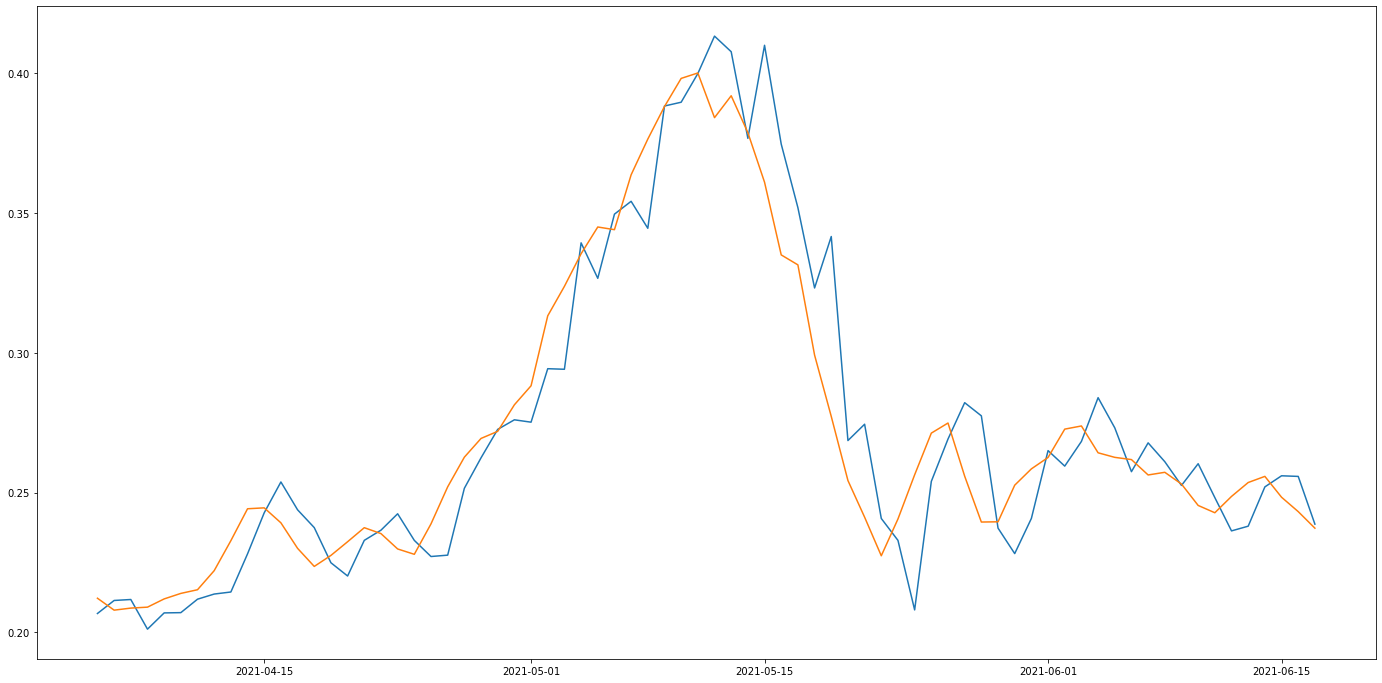

In [33]:
fig= plt.figure(figsize=(24,12))
plt.plot(LSTM_model.index,LSTM_model.ClosingPrice)
plt.plot(LSTM_model.index,LSTM_model.ARIMA_LSTM)
plt.show()

# 4. Đánh giá mô hình ARIMA

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
#MAPE
mean_absolute_percentage_error(LSTM_model.ClosingPrice,LSTM_model.ARIMA_LSTM)

6.356819902084454

In [35]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(LSTM_model.ClosingPrice,LSTM_model.ARIMA_LSTM)
RMSE = math.sqrt(MSE)
print(RMSE)

0.024155823752056937
